# <span style="color:#47555E">NATURAL LANGUAGE PROCESSING: Comparative Analysis of Language Usage in the Top 100 Forked GitHub Repositories</span>

## <Span style= 'color: #48AAAD'>EXPLORATION NOTEBOOK
* By Annie Carter for Science of the Fork Organization
* Source: GitHub Repository Pulled 18 August 2023

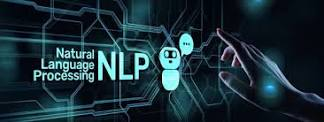

In [1]:
# Transformation 
import pandas as pd
import numpy as np
import os
import json
import warnings
warnings.filterwarnings("ignore")

#My imports 
import wrangle as w
from env import github_token, github_username
import acquire as a 
import prepare as p


#NLP Acquire and Preparation Techniques
from typing import Dict, List, Optional, Union, cast
import requests
from bs4 import BeautifulSoup
from time import sleep
import re
import unicodedata
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#NLP Explore
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer


# Exploring
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency


# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns


#NLP Modeling 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

#CodeUp visualize scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer


![image](https://github.com/Science-of-the-Fork/nlp-project/assets/131205837/3c286317-2826-45ad-bfb6-8c9ec3a8679f)



# <Span style= 'color: #48AAAD'>AQCUIRE

In [2]:
language_df = w.read_py_js('full_py_and_js_data.csv')

In [3]:
language_df = language_df.drop(columns=['Unnamed: 0.1'], errors='ignore')
language_df = language_df.drop(columns=['Unnamed: 0'], errors='ignore') 
language_df.rename(columns={'readme_content': 'original'}, inplace=True)

In [4]:
language_df.head(2)

,repo_name,url,language,original
0,jackfrued/Python-100-Days,https://github.com/jackfrued/Python-100-Days/b...,Python,Python - 100天从新手到大师作者：骆昊说明：从项目上线到获得8w+星标以来，一直收...
1,donnemartin/system-design-primer,https://github.com/donnemartin/system-design-p...,Python,English ∙ 日本語 ∙ 简体中文 ∙ 繁體中文 | العَرَبِيَّة‎ ∙ ...


# <Span style= 'color: #48AAAD'>PREPARE

In [5]:
language_df['cleaned'] = language_df['original'].apply(w.nlp_clean)

In [6]:
language_df['lemmatized'] = language_df['original'].apply(w.lemmatize_text)

In [7]:
language_df.head(3).T

,0,1,2
repo_name,jackfrued/Python-100-Days,donnemartin/system-design-primer,Significant-Gravitas/Auto-GPT
url,https://github.com/jackfrued/Python-100-Days/b...,https://github.com/donnemartin/system-design-p...,https://github.com/Significant-Gravitas/Auto-G...
language,Python,Python,Python
original,Python - 100天从新手到大师作者：骆昊说明：从项目上线到获得8w+星标以来，一直收...,English ∙ 日本語 ∙ 简体中文 ∙ 繁體中文 | العَرَبِيَّة‎ ∙ ...,Auto-GPT: An Autonomous GPT-4 Experiment💡 Get ...
cleaned,"[python, 1008w15pythoncore50coursespythonbpyth...","[english, portugues, do, brasil, deutsch, ital...","[autogpt, an, autonomous, gpt4, experiment, ge..."
lemmatized,python 1008w15pythoncore50coursespythonbpython...,english portugues brasil deutsch italiano pols...,autogpt autonomous gpt4 experiment get help qa...


# <Span style= 'color: #48AAAD'>INTIAL EXPLORATION ON ALL WORDS

#### Total Length of Words in Different Columns

In [8]:
# Total number of words per column
w.words_by_columns(language_df)

Total length of words in 'original' column: 2038676
Total length of words in 'cleaned' column: 216005
Total length of words in 'lemmatized' column: 1325250


#### Total Length of Words in Different Columns Barplot

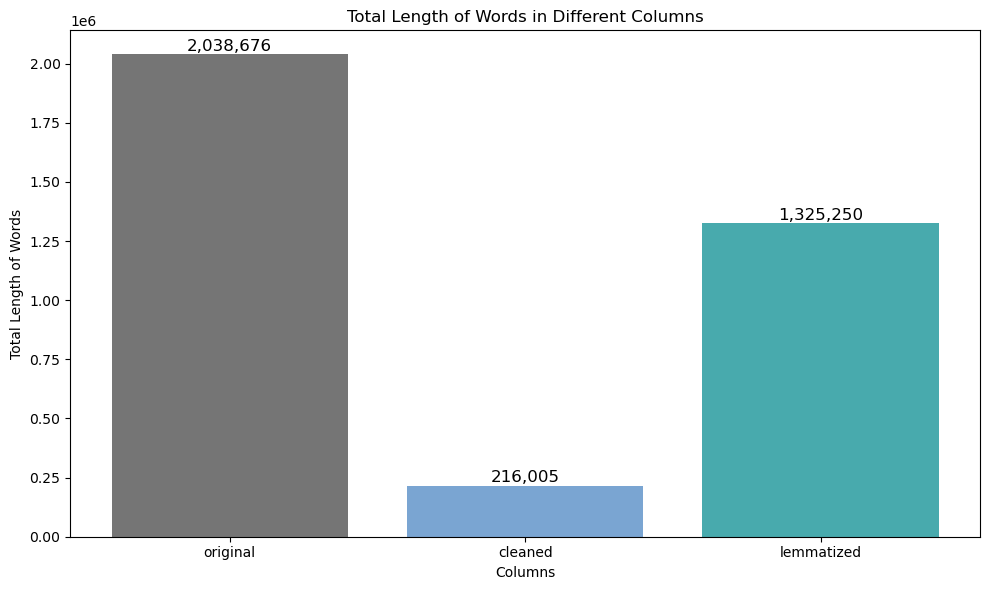

In [9]:
w.words_by_column_bar(language_df)
    

#### 'Average Number of Words in Rows by Different Columns'

Average number of words in 'original' column: 11453.24
Average number of words in 'cleaned' column: 1213.51
Average number of words in 'lemmatized' column: 7445.22


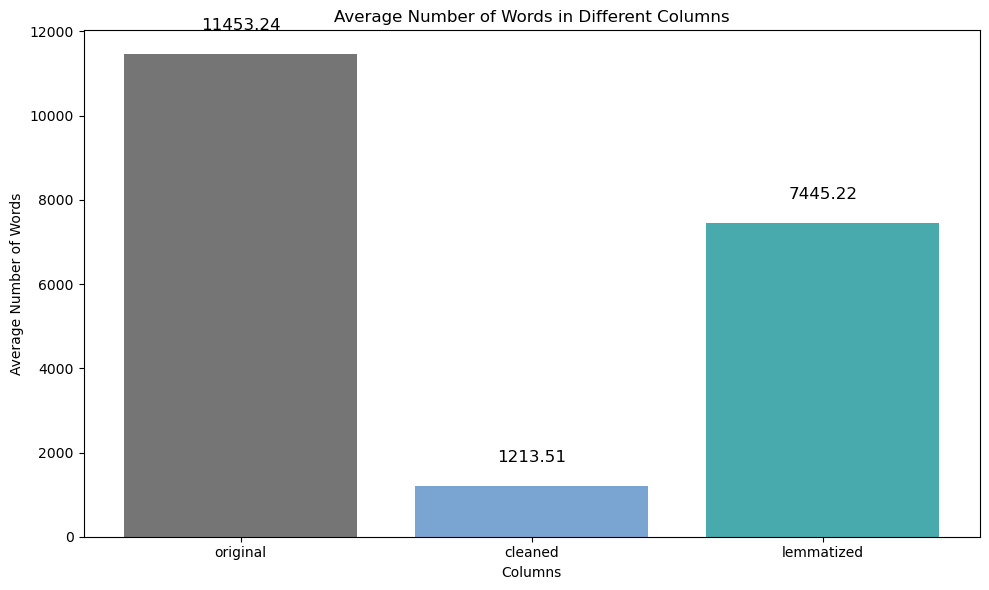

In [10]:
w.words_by_row(language_df)

# ________________________________________________________________________________________________________________

 # <Span style= 'color: #303841'> VISAUL EXPLORATION FOR Q1-Q6 & HYPOTHESIS TESTING

## <span style = 'color: #48AAAD'>INITIAL QUESTIONS EXPLORED

1. **Between JavaScript and Python, which language exhibits greater prevalence within the content of the READMEs?**
   
2. **In a compilation of the top 100 most Forked GitHub repositories, what are the five words that demonstrate the highest frequency of occurrence?**
   
3. **Within JavaScript code segments, which bigrams, or sequential pairs of words, are commonly encountered?**
   
4. **In the context of Python code segments, which particular bigrams, or consecutive pairs of words, emerge as prominent occurrences?**
   
5. **Within JavaScript code samples, what are the frequently occurring bigrams, or sequences of two words?**
   
6. **In Python code excerpts, what trigrams, or sets of three consecutive words, stand out as prominent linguistic patterns?**


# ________________________________________________________________________________________________________________

## <span style = 'color:#47555E'> 1. Between <span style = 'color: #4584B6'> PYTHON </span> VS <span style = 'color:#FFDE57'> JAVASCRIPT </span> <span style = 'color:#47555E'>, which language exhibits greater prevalence within the content of the READMEs?

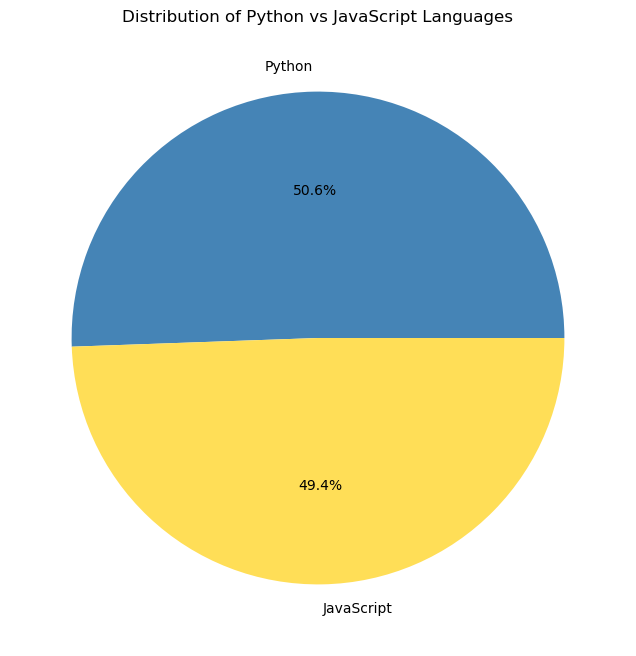

In [11]:
w.Q1_pie(language_df)

In [12]:
w.Q1_stat(language_df)

Chi-squared value: 0.0
p_value = 1.0000
Degrees of freedom: 0
Expected frequencies:
[[88.]
 [90.]]

----
p_value = 1.0000
The p-value is less than the alpha: False
we fail to reject the null


## <span style = 'color:#47555E'> 2. In a compilation of the top 100 most Forked GitHub repositories, what are the five words that demonstrate the highest frequency of occurrence?

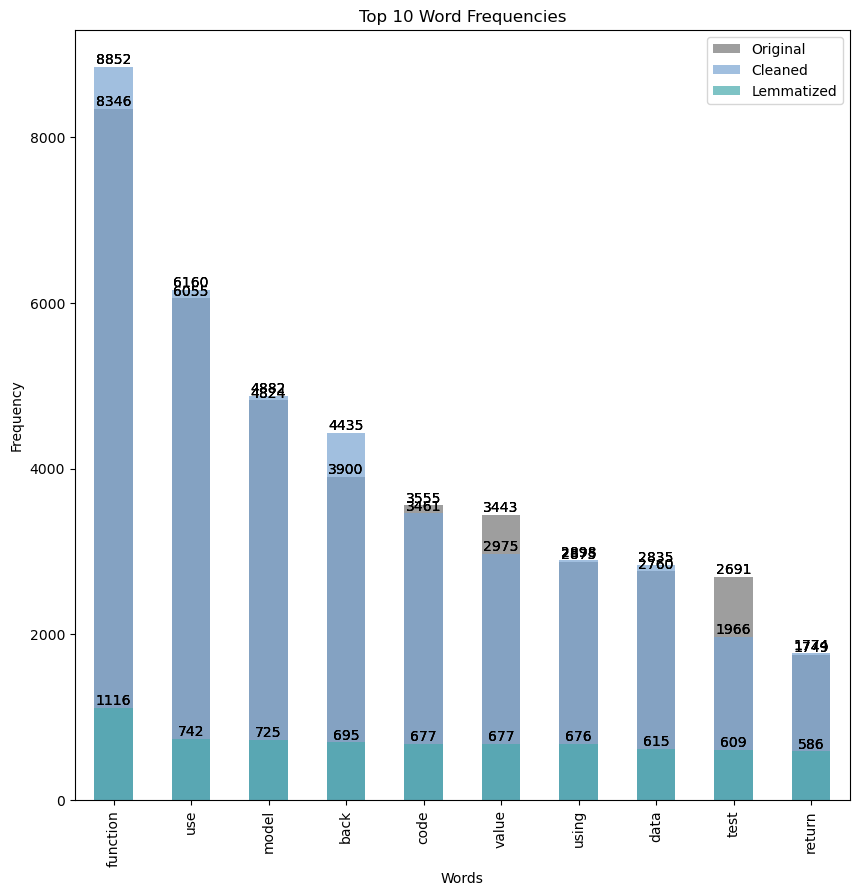

In [13]:
w.top_10_words(language_df)

### <span style = 'color:#47555E'>  FIndings: Top 100 most Forked GitHub repositories, what are the five (10) words that demonstrate the highest frequency of occurrencFindings: Top 10 words
1. data
2. learning
3. machine
4. library
5. python
6. api
7. open
8. javascript
9. using
10. code

##  <span style = 'color:#47555E'> DID NOT INCLUDE IN WRANGLE BUT STILL PRETTY 
### <span style = 'color:#47555E'>  Findings: Top 5 words based on Column (Original, Cleaned, Lemmatized)

In [14]:
# Split each set of words by spaces, turn into a list, and calculate value counts
original_freq = language_df['original'].str.split().explode().value_counts()
cleaned_freq = language_df['cleaned'].explode().value_counts()
lemmatized_freq = language_df['lemmatized'].str.split().explode().value_counts()
print(f"Word Frequency Counts:\n{'-'*30}")
print(f"Original Column:\n{original_freq.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{cleaned_freq.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{lemmatized_freq.head()}\n{'-'*30}")

Word Frequency Counts:
------------------------------
Original Column:
the    8346
to     6055
and    4824
a      3900
-      3555
Name: original, dtype: int64
------------------------------
Cleaned Column:
the    8852
to     6160
and    4882
a      4435
of     3461
Name: cleaned, dtype: int64
------------------------------
Lemmatized Column:
function    1116
use          742
model        725
back         695
code         677
Name: lemmatized, dtype: int64
------------------------------


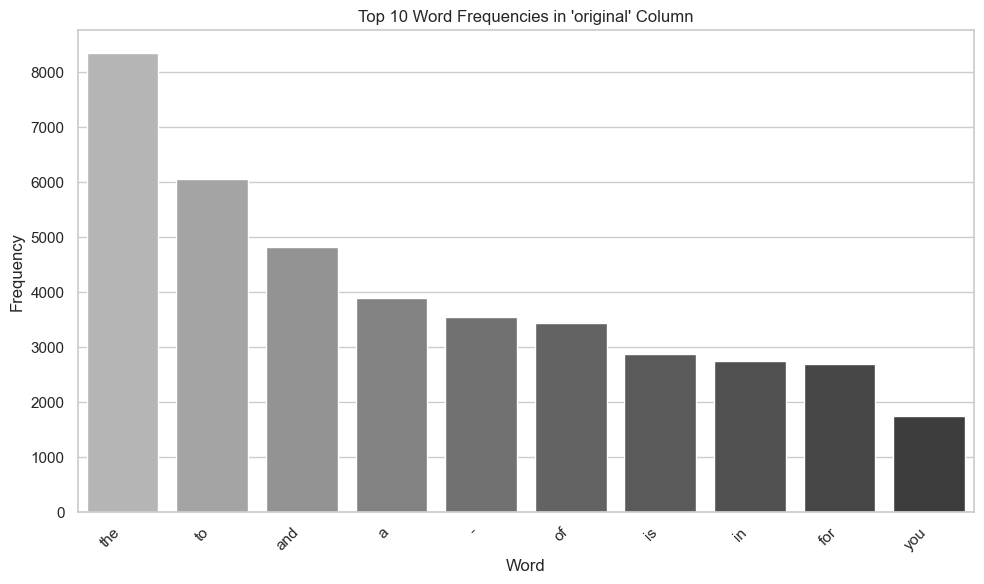

In [15]:
# Create a DataFrame for word frequencies
original_words = language_df['original'].str.split().explode().value_counts()
cleaned_words = language_df['cleaned'].explode().value_counts()
lemmatized_words = language_df['lemmatized'].str.split().explode().value_counts()
word_freq_df = pd.DataFrame({
    'Word': original_words.index,
    'Frequency': original_words.values
})

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=word_freq_df.head(10), x='Word', y='Frequency', palette="Greys_d")
plt.title("Top 10 Word Frequencies in 'original' Column")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

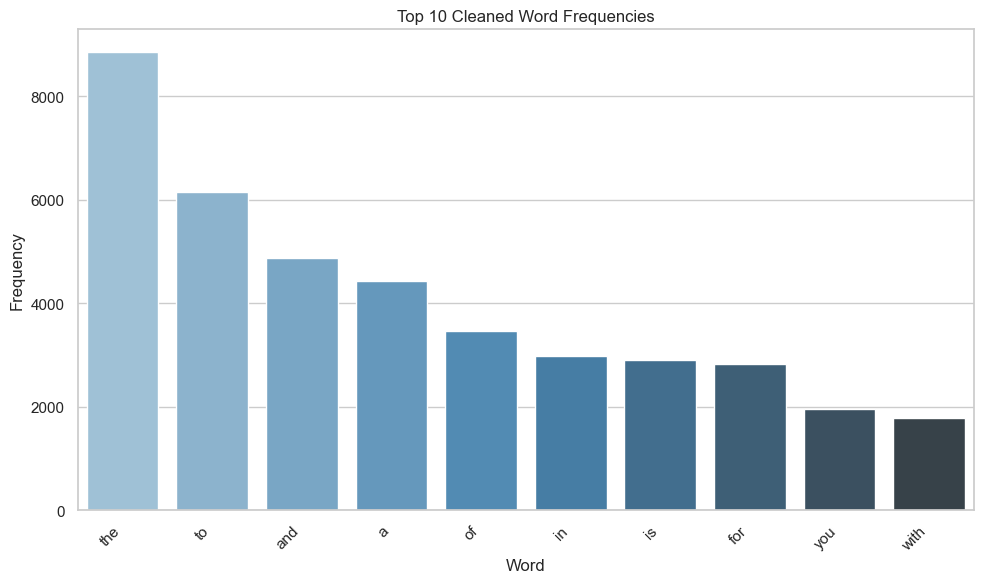

In [16]:
# Create a DataFrame for cleaned word frequencies
cleaned_word_freq_df = pd.DataFrame({
    'Word': cleaned_words.index,
    'Frequency': cleaned_words.values
})

# Sort the DataFrame by frequency in descending order
cleaned_word_freq_df = cleaned_word_freq_df.sort_values(by='Frequency', ascending=False)

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=cleaned_word_freq_df.head(10), x='Word', y='Frequency', palette="Blues_d")
plt.title("Top 10 Cleaned Word Frequencies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


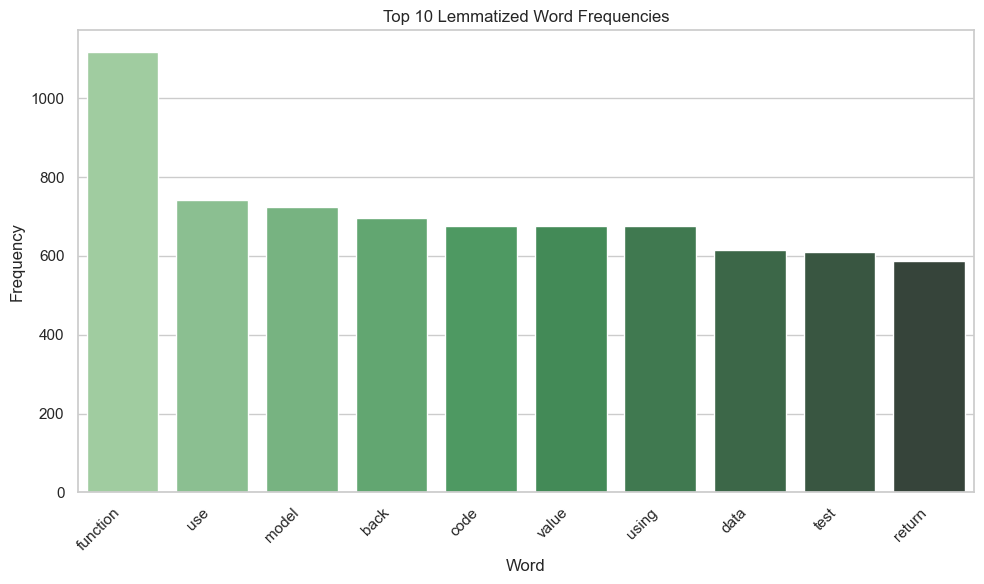

In [17]:
# Create a DataFrame for lemmatized word frequencies
lemmatized_word_freq_df = pd.DataFrame({
    'Word': lemmatized_words.index,
    'Frequency': lemmatized_words.values
})

# Sort the DataFrame by frequency in descending order
lemmatized_word_freq_df = lemmatized_word_freq_df.sort_values(by='Frequency', ascending=False)

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=lemmatized_word_freq_df.head(10), x='Word', y='Frequency', palette="Greens_d")
plt.title("Top 10 Lemmatized Word Frequencies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


## <span style = 'color:#47555E'>  Findings: Top 10 words based on Language and (Original, Cleaned, Lemmatized) Columns

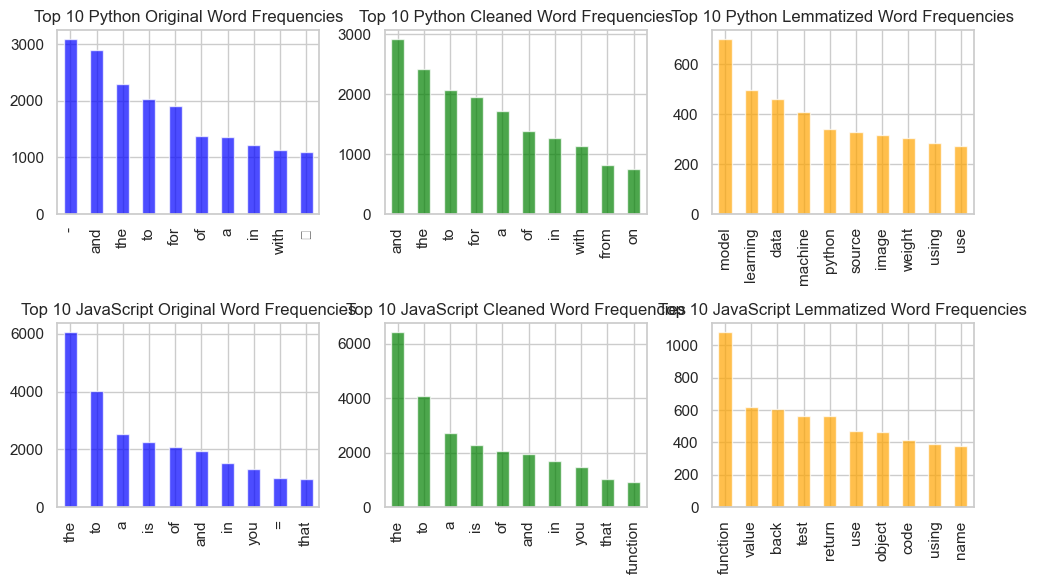

In [18]:
#Actually Q1_bar shows most frequent words in Fork ReadMe
w.Q1_bar(language_df)

## <span style = 'color:#47555E'> 3. **Within JavaScript code segments, which bigrams, or sequential pairs of words, are commonly encountered?**

## <span style = 'color:#47555E'>Q3 BIGRAMS <span style = 'color:#FFDE57'>JavaScript </span>     

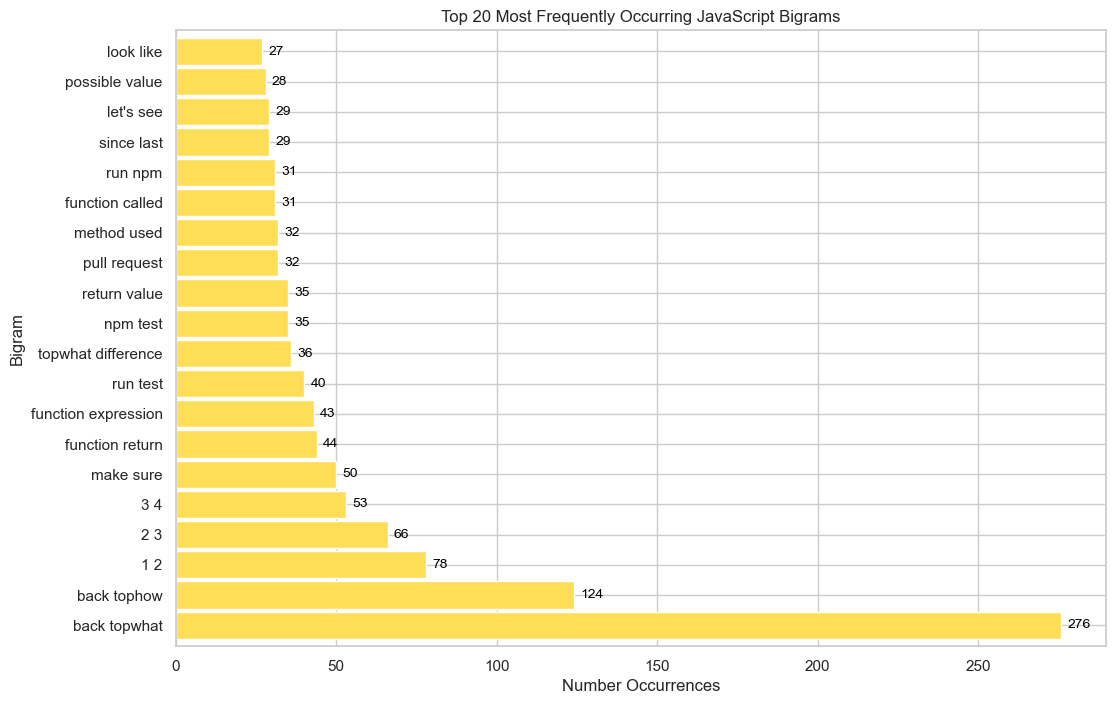

In [19]:
w.Q3_JsBigram_barplot(language_df)

## <span style = 'color:#47555E'> **Q4. In the context of Python code segments, which particular bigrams, or two consecutive pairs of words, emerge as prominent occurrences?**
## <span style = 'color:#47555E'>  Q4 BIGRAMS  <span style = 'color: #4584B6'> PYTHON </span> 

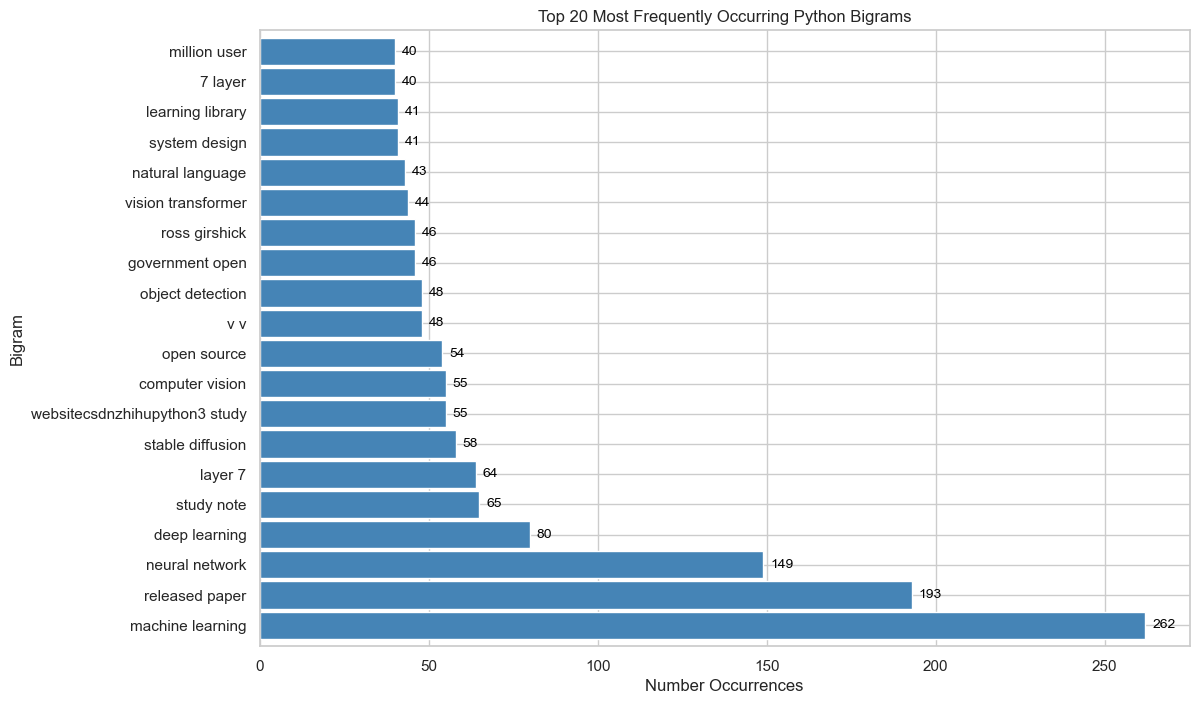

In [20]:
w.Q4_PyBigram_barplot(language_df)

## <span style = 'color:#47555E'> 5. **Within JavaScript code samples, what are the frequently occurring trigrams, or sequences of three words?**
##   <span style = 'color:#47555E'>Q5 TRIGRAMS <span style = 'color:#FFDE57'>JavaScript </span> 

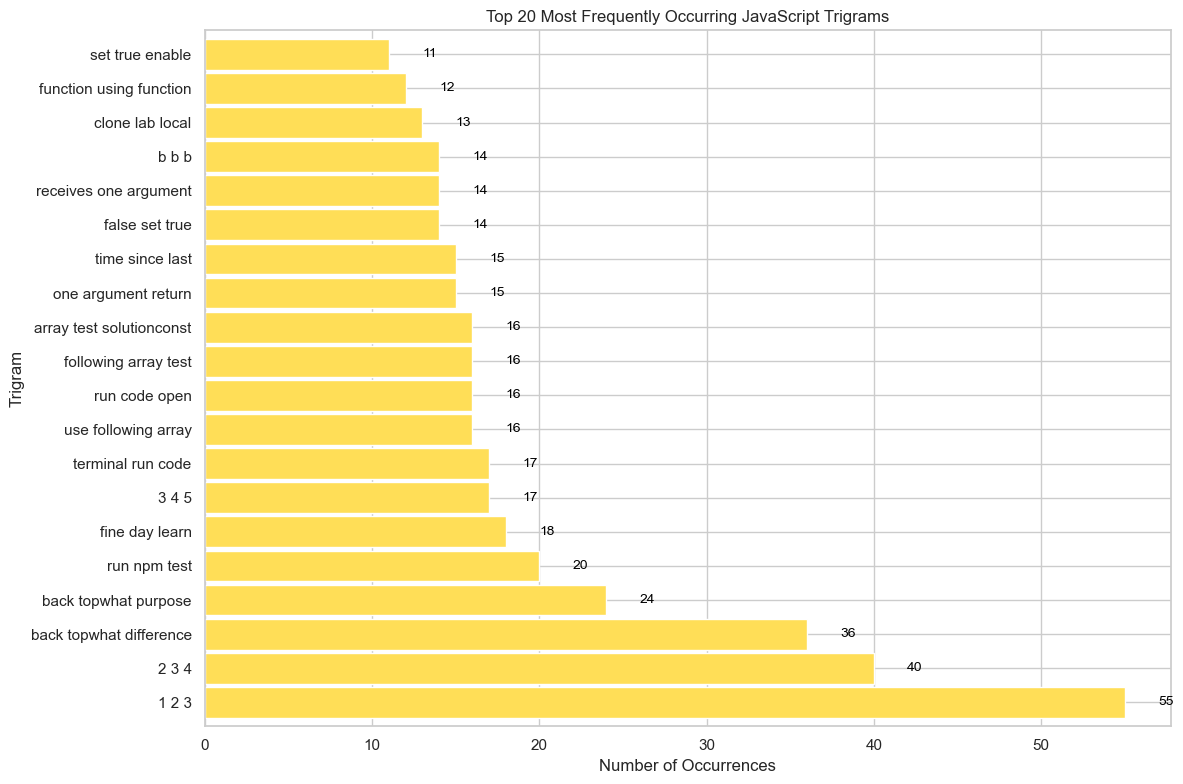

In [21]:
w.Q5_JsTrigram_barplot(language_df)

## <span style = 'color:#47555E'> 6. **In Python code excerpts, what trigrams, or sets of three consecutive words, stand out as prominent linguistic patterns?**
## <span style = 'color:#47555E'>  Q6 TRIGRAMS  <span style = 'color: #4584B6'> PYTHON </span>  

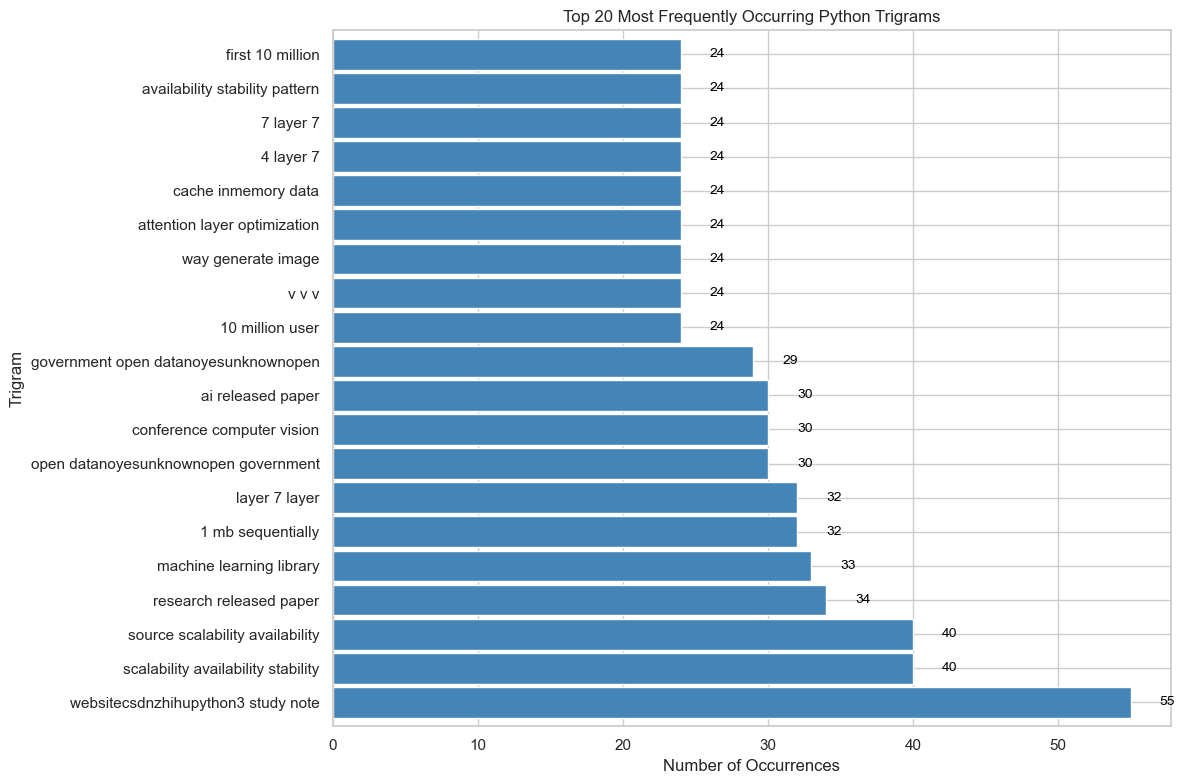

In [22]:
w.Q6_PyTrigram_barplot(language_df)

## <Span style= 'color: #48AAAD'>  MODELING

### <span style = 'color:#47555E'>  Hypothesis 2 - Term Frequency-Inverse Document Frequency (TF-IDF) analysis to use scores for words across the repository texts, in order to identify the most significant and frequent words. Selecting the top five words based on their TF-IDF scores.

In [ ]:
language_df.head()

,repo_name,url,language,original,cleaned,lemmatized,original_length,cleaned_length,lemmatized_length
0,jackfrued/Python-100-Days,https://github.com/jackfrued/Python-100-Days/b...,Python,Python - 100天从新手到大师作者：骆昊说明：从项目上线到获得8w+星标以来，一直收...,"[python, 1008w15pythoncore50coursespythonbpyth...",python 1008w15pythoncore50coursespythonbpython...,11453.235955,1213.511236,7445.224719
1,donnemartin/system-design-primer,https://github.com/donnemartin/system-design-p...,Python,English ∙ 日本語 ∙ 简体中文 ∙ 繁體中文 | العَرَبِيَّة‎ ∙ ...,"[english, portugues, do, brasil, deutsch, ital...",english portugues brasil deutsch italiano pols...,11453.235955,1213.511236,7445.224719
2,Significant-Gravitas/Auto-GPT,https://github.com/Significant-Gravitas/Auto-G...,Python,Auto-GPT: An Autonomous GPT-4 Experiment💡 Get ...,"[autogpt, an, autonomous, gpt4, experiment, ge...",autogpt autonomous gpt4 experiment get help qa...,11453.235955,1213.511236,7445.224719
3,AUTOMATIC1111/stable-diffusion-webui,https://github.com/AUTOMATIC1111/stable-diffus...,Python,Stable Diffusion web UIA browser interface bas...,"[stable, diffusion, web, uia, browser, interfa...",stable diffusion web uia browser interface bas...,11453.235955,1213.511236,7445.224719
4,yandex-praktikum/backend_test_homework,https://github.com/yandex-praktikum/backend_te...,Python,backend_test_homework,[backendtesthomework],backendtesthomework,11453.235955,1213.511236,7445.224719


## Term Frequency (TF) for Python JavaScript and All 

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have the DataFrame language_df with the necessary columns
# language_df = read_csv_file('full_py_and_js_data.csv')

# Extract text data for Python, JavaScript, and All languages from 'lemmatized' column
text_js = language_df[language_df['language'] == 'JavaScript']['lemmatized']
text_py = language_df[language_df['language'] == 'Python']['lemmatized']
text_all = language_df['lemmatized']

# Combine text data into lists for TF-IDF vectorization
documents_js = text_js.tolist()
documents_py = text_py.tolist()
documents_all = text_all.tolist()

# Create TF-IDF vectorizers for Python, JavaScript, and All languages
tfidf_vectorizer_js = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_vectorizer_py = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_vectorizer_all = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data into TF-IDF matrices
tfidf_matrix_js = tfidf_vectorizer_js.fit_transform(documents_js)
tfidf_matrix_py = tfidf_vectorizer_py.fit_transform(documents_py)
tfidf_matrix_all = tfidf_vectorizer_all.fit_transform(documents_all)

# Get the feature names
feature_names_js = tfidf_vectorizer_js.get_feature_names_out()
feature_names_py = tfidf_vectorizer_py.get_feature_names_out()
feature_names_all = tfidf_vectorizer_all.get_feature_names_out()

# Calculate raw count, word count, and augmented frequency for JavaScript
raw_count_js = tfidf_matrix_js.sum(axis=0).A1
word_count_js = tfidf_matrix_js.shape[0]
frequency_js = raw_count_js / raw_count_js.sum()
augmented_frequency_js = raw_count_js / raw_count_js.max()

# Calculate raw count, word count, and augmented frequency for Python
raw_count_py = tfidf_matrix_py.sum(axis=0).A1
word_count_py = tfidf_matrix_py.shape[0]
frequency_py = raw_count_py / raw_count_py.sum()
augmented_frequency_py = raw_count_py / raw_count_py.max()

# Calculate raw count, word count, and augmented frequency for All languages
raw_count_all = tfidf_matrix_all.sum(axis=0).A1
word_count_all = tfidf_matrix_all.shape[0]
frequency_all = raw_count_all / raw_count_all.sum()
augmented_frequency_all = raw_count_all / raw_count_all.max()

# Create DataFrames for TF-IDF statistics
js_statistics = pd.DataFrame({
    'Word': feature_names_js,
    'Raw Count': raw_count_js,
    'Frequency': frequency_js,
    'Augmented Frequency': augmented_frequency_js
})

py_statistics = pd.DataFrame({
    'Word': feature_names_py,
    'Raw Count': raw_count_py,
    'Frequency': frequency_py,
    'Augmented Frequency': augmented_frequency_py
})

all_statistics = pd.DataFrame({
    'Word': feature_names_all,
    'Raw Count': raw_count_all,
    'Frequency': frequency_all,
    'Augmented Frequency': augmented_frequency_all
})

In [60]:
# Display statistics for JavaScript
print("JavaScript TF-IDF Statistics:")
js_statistics.sample(10)

JavaScript TF-IDF Statistics:


,Word,Raw Count,Frequency,Augmented Frequency
725,push,1.097917,0.002000,0.144763
448,holiday,1.822530,0.003320,0.240305
841,solutionconst,0.221415,0.000403,0.029194
786,run,3.031660,0.005523,0.399731
489,instance,0.355138,0.000647,0.046826
387,final,0.229227,0.000418,0.030224
463,implement,0.253699,0.000462,0.033451
276,debugger,0.238080,0.000434,0.031391
557,logging,0.281296,0.000512,0.037089
375,extra,0.136964,0.000249,0.018059


In [61]:
# Display statistics for Python
print("\nPython TF-IDF Statistics:")
py_statistics.sample(10)


Python TF-IDF Statistics:


,Word,Raw Count,Frequency,Augmented Frequency
931,usread,0.392718,0.000615,0.065113
147,change,1.153000,0.001805,0.191168
297,english,1.276794,0.001999,0.211694
153,check,2.163489,0.003387,0.358708
545,material,0.088992,0.000139,0.014755
26,288,0.199248,0.000312,0.033036
88,arbitrary,0.357303,0.000559,0.059241
625,page,0.963205,0.001508,0.159700
884,timm,0.597745,0.000936,0.099107
793,semantic,0.128410,0.000201,0.021291


In [62]:
# Display statistics for All languages
print("\nAll Languages TF-IDF Statistics:")
all_statistics.sample(10)


All Languages TF-IDF Statistics:


,Word,Raw Count,Frequency,Augmented Frequency
202,contributing,1.775035,0.001576,0.179240
70,app,3.140793,0.002788,0.317153
542,message,1.872088,0.001662,0.189041
616,package,0.530872,0.000471,0.053607
429,inmemory,0.703170,0.000624,0.071005
912,trying,0.482271,0.000428,0.048699
99,backbone,0.434787,0.000386,0.043904
283,easier,0.853031,0.000757,0.086138
21,288,0.200678,0.000178,0.020264
847,string,4.436330,0.003938,0.447974


In [ ]:

# Extract text data for Python and JavaScript separately
text_js = language_df[language_df['language'] == 'JavaScript']['lemmatized']
text_py = language_df[language_df['language'] == 'Python']['lemmatized']

# Combine text data into lists for TF-IDF vectorization
documents_js = text_js.tolist()
documents_py = text_py.tolist()

# Create TF-IDF vectorizers for Python and JavaScript
tfidf_vectorizer_js = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_vectorizer_py = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data into TF-IDF matrices
tfidf_matrix_js = tfidf_vectorizer_js.fit_transform(documents_js)
tfidf_matrix_py = tfidf_vectorizer_py.fit_transform(documents_py)

# Get the feature names (terms)
feature_names_js = tfidf_vectorizer_js.get_feature_names_out()
feature_names_py = tfidf_vectorizer_py.get_feature_names_out()

# Create DataFrames for TF-IDF statistics
tfidf_js_df = pd.DataFrame(tfidf_matrix_js.toarray(), columns=feature_names_js)
tfidf_py_df = pd.DataFrame(tfidf_matrix_py.toarray(), columns=feature_names_py)

In [32]:
# Display the head of TF-IDF DataFrames
print("JavaScript TF-IDF Statistics:")
tfidf_js_df.head()

JavaScript TF-IDF Statistics:


,00,01,02,03,04,05,08,10,100,11,...,working,world,worry,wrap,wrapped,write,writing,written,yield,zero
0,0.012391,0.000000,0.0,0.005859,0.0,0.012391,0.0,0.024612,0.009624,0.0,...,0.003428,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00401,0.0,0.035152
1,0.000000,0.117592,0.0,0.000000,0.0,0.000000,0.0,0.038927,0.045663,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.026570,0.0,0.0,0.000000,0.0,0.043961,0.000000,0.00000,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.010794,0.0,0.0,0.014284,0.0,0.000000,0.011855,0.00000,0.0,0.000000


In [33]:
print("\nPython TF-IDF Statistics:")
tfidf_py_df.head()


Python TF-IDF Statistics:


,06x,10,100,1000,10000,1000000,10000000,10x,12,13,...,year,yolov5,youtube,yu,zhang,zhao,zhou,zip,zoo,zookeeper
0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000
1,0.0,0.149041,0.050932,0.069175,0.122724,0.04909,0.04909,0.047529,0.018269,0.019834,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.04909
2,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.028278,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.035692,0.0,0.0,0.0,0.00000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000


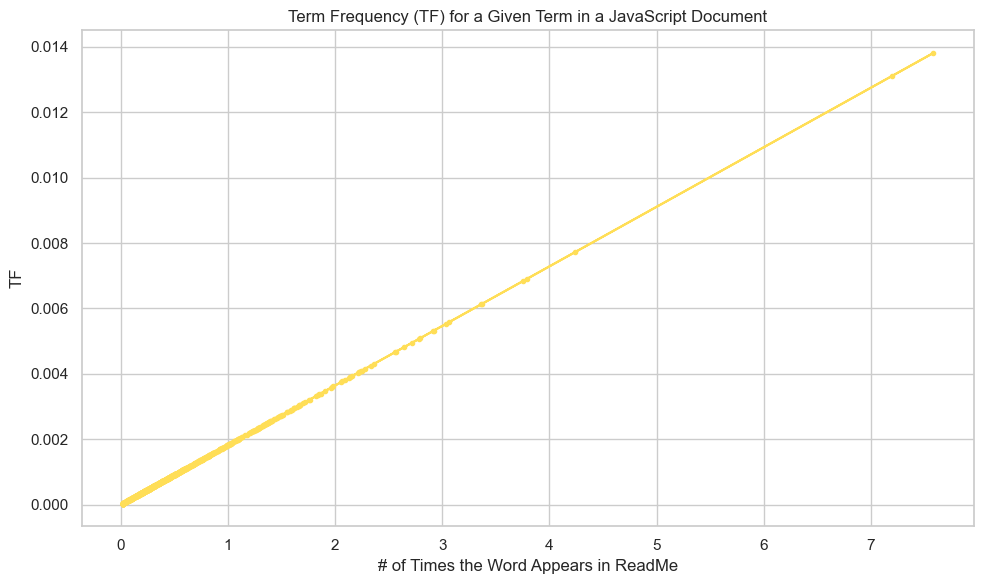

In [64]:
# Extract the necessary data from js_statistics
x_js = js_statistics['Raw Count']
y_js = js_statistics['Frequency']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(x_js, y_js, marker='.', color='#FFDE57')

plt.xlabel('# of Times the Word Appears in ReadMe')
plt.ylabel('TF')
plt.title('Term Frequency (TF) for a Given Term in a JavaScript Document')

plt.tight_layout()
plt.show()

##   <span style = 'color:#47555E'> Inverse Document Frequency (IDF) <span style = 'color:#FFDE57'>JavaScript </span>  

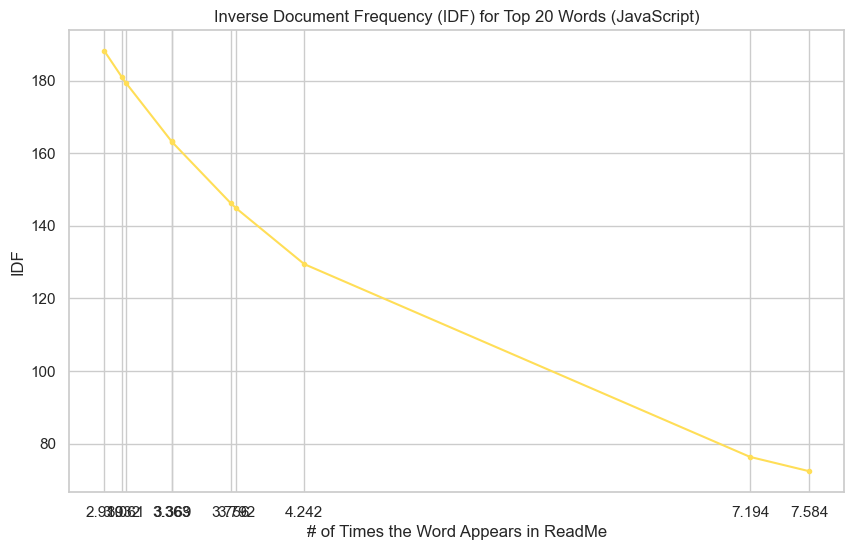

In [68]:
# Extract the necessary data from js_statistics and limit to top 20 terms
top_js_statistics = js_statistics.nlargest(10, 'Raw Count')
x_js = top_js_statistics['Raw Count']
y_js = 1 / top_js_statistics['Frequency']  # Calculate IDF

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(x_js, y_js, marker='.', color='#FFDE57')

plt.xlabel('# of Times the Word Appears in ReadMe')
plt.ylabel('IDF')
plt.title('Inverse Document Frequency (IDF) for Top 20 Words (JavaScript)')

plt.xticks(x_js)  # Set x-axis ticks to match the values in x_js

plt.show()


## <span style = 'color:#47555E'> Inverse Document Frequency (IDF)  <span style = 'color: #4584B6'> PYTHON </span> 

In [ ]:
n_words = 10

x_py = np.arange(1, n_words + 1)
y_py = x_py / n_words

plt.plot(x_py, y_py, marker='.', color= '#4584B6')

plt.xlabel('# of time the word appears in Readme')
plt.ylabel('TF')
plt.title('TF for a given term in a Python document')

plt.show()

In [ ]:
Py_words_lemmatized = 20

x = np.arange(1, Py_words_lemmatized + 1)
y = np.log(Py_words_lemmatized / x)

plt.plot(x, y, marker='.', color= '#4584B6')

plt.xticks(x)
plt.xlabel('# of Readme the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word (Python)')

plt.show()

##   <span style = 'color:#47555E'> TF-IDF LEMMATIZED

In [ ]:
data = language_df


# Create feature vectors
tf_vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features

X_tf = tf_vectorizer.fit_transform(data['lemmatized']).toarray()
X_tfidf = tfidf_vectorizer.fit_transform(data['lemmatized']).toarray()
y = data['language']

# Split the data
X_train_tf, X_test_tf, y_train, y_test = train_test_split(X_tf, y, test_size=0.2, random_state=123)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=123)

# Build and train models
model_tf = LogisticRegression()
model_tfidf = LogisticRegression()

model_tf.fit(X_train_tf, y_train)
model_tfidf.fit(X_train_tfidf, y_train)

# Evaluate performance
y_pred_tf = model_tf.predict(X_test_tf)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

accuracy_tf = accuracy_score(y_test, y_pred_tf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("TF Model Accuracy:", accuracy_tf)
print("TF-IDF Model Accuracy:", accuracy_tfidf)

print("TF Model Classification Report:")
print(classification_report(y_test, y_pred_tf))

print("TF-IDF Model Classification Report:")
print(classification_report(y_test, y_pred_tfidf))

# _______________________________________________________________________________________________

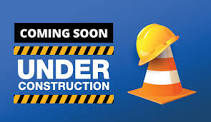
## STILL EXPLORING AND TWEAKING BELOW

# _______________________________________________________________________________________________

In [ ]:
def top_10_words(language_df)

# Split each set of words by spaces, turn into a list, and calculate value counts
original_words = language_df['original'].str.split().explode().value_counts()
cleaned_words = language_df['cleaned'].explode().value_counts()
lemmatized_words = language_df['lemmatized'].str.split().explode().value_counts()

# Plotting
plt.figure(figsize=(10, 10))

original_plot = original_words[:10].plot(kind='bar', color='#757575', alpha=0.7, label='Original')
cleaned_plot = cleaned_words[:10].plot(kind='bar', color='#7AA5D2', alpha=0.7, label='Cleaned')
lemmatized_plot = lemmatized_words[:10].plot(kind='bar', color='#48AAAD', alpha=0.7, label='Lemmatized')

# Annotate bars with their counts
for p in original_plot.patches:
    original_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in cleaned_plot.patches:
    cleaned_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in lemmatized_plot.patches:
    lemmatized_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.legend()

plt.show()


# <span style = 'color:#4584B6'>______________________________________________________________________________________________________________

## <span style = 'color:#47555E'> **Q1. Between <span style = 'color: #4584B6'> PYTHON </span> VS <span style = 'color:#FFDE57'> JAVASCRIPT </span> <span style = 'color:#47555E'>, which language exhibits greater prevalence within the content of the READMEs?**
   
   

In [ ]:
# Calculate the value counts for each language
language_counts = language_df['language'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=['#4584B6', '#FFDE57'])
plt.title('Distribution of Python vs JavaScript Languages')
plt.show()

### Findings Equal Distribution no prevalent of one vs other. * Could be the way we scraped the data need to readdress

In [ ]:
# Split each set of words by spaces, turn into a list, and calculate value counts
Py_words_original = language_df[language_df['language'] == 'Python']['original'].str.split().explode().value_counts()
Py_words_cleaned = language_df[language_df['language'] == 'Python']['cleaned'].str.split().explode().value_counts()
Py_words_lemmatized = language_df[language_df['language'] == 'Python']['lemmatized'].str.split().explode().value_counts()

print(f"Word Frequency Counts for Python Language:\n{'-'*30}")
print(f"Original Column:\n{Py_words_original.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{Py_words_cleaned.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{Py_words_lemmatized.head()}\n{'-'*30}")


In [ ]:
# Split each set of words by spaces, turn into a list, and calculate value counts
js_words_original = language_df[language_df['language'] == 'JavaScript']['original'].str.split().explode().value_counts()
js_words_cleaned = language_df[language_df['language'] == 'JavaScript']['cleaned'].str.split().explode().value_counts()
js_words_lemmatized = language_df[language_df['language'] == 'JavaScript']['lemmatized'].str.split().explode().value_counts()

print(f"Word Frequency Counts for JavaScript Language:\n{'-'*30}")
print(f"Original Column:\n{js_words_original.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{js_words_cleaned.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{js_words_lemmatized.head()}\n{'-'*30}")


## <span style = 'color:#47555E'> Q1 WORD CLOUDS  <span style = 'color: #4584B6'> PYTHON </span> VS <span style = 'color:#FFDE57'>JAVASCRIPT </span> 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split each set of words by spaces, turn into a list, and calculate value counts
Py_words_original = language_df[language_df['language'] == 'Python']['original'].str.split().explode().value_counts()
Py_words_cleaned = language_df[language_df['language'] == 'Python']['cleaned'].explode().value_counts()
Py_words_lemmatized = language_df[language_df['language'] == 'Python']['lemmatized'].str.split().explode().value_counts()

Js_words_original = language_df[language_df['language'] == 'JavaScript']['original'].str.split().explode().value_counts()
Js_words_cleaned = language_df[language_df['language'] == 'JavaScript']['cleaned'].explode().value_counts()
Js_words_lemmatized = language_df[language_df['language'] == 'JavaScript']['lemmatized'].str.split().explode().value_counts()

# Function to generate word cloud
def generate_word_cloud(words, title):
    wordcloud = WordCloud(background_color='white').generate(' '.join(words))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
# Generate word clouds for Python Original
generate_word_cloud(Py_words_original.index, 'Most Common Python Words (Original)')

In [ ]:
# Generate word clouds for JavaScript Original
generate_word_cloud(Js_words_original.index, 'Most Common JavaScript Words (Original)')

In [ ]:
# Generate word clouds for JavaScript Cleaned
generate_word_cloud(Js_words_cleaned.index, 'Most Common JavaScript Words (Cleaned)')

In [ ]:
# Generate word clouds for JavaScript Lemmatized
generate_word_cloud(Js_words_lemmatized.index, 'Most Common JavaScript Words (Lemmatized)')

In [ ]:
# Generate word clouds for Python Lemmatized
generate_word_cloud(Py_words_lemmatized.index, 'Most Common Python Words (Lemmatized)')

In [ ]:
# Generate word clouds for Python Cleaned
generate_word_cloud(Py_words_cleaned.index, 'Most Common Python Words (Cleaned)')

## <span style = 'color:#47555E'> Q1 BAR PLOTS  <span style = 'color: #4584B6'> PYTHON </span> VS <span style = 'color:#FFDE57'> JAVASCRIPT </span> 

In [ ]:
import matplotlib.pyplot as plt

# Split each set of words by spaces, turn into a list, and calculate value counts
Py_words_original = language_df[language_df['language'] == 'Python']['original'].str.split().explode().value_counts()
Py_words_cleaned = language_df[language_df['language'] == 'Python']['cleaned'].explode().value_counts()
Py_words_lemmatized = language_df[language_df['language'] == 'Python']['lemmatized'].str.split().explode().value_counts()

Js_words_original = language_df[language_df['language'] == 'JavaScript']['original'].str.split().explode().value_counts()
Js_words_cleaned = language_df[language_df['language'] == 'JavaScript']['cleaned'].explode().value_counts()
Js_words_lemmatized = language_df[language_df['language'] == 'JavaScript']['lemmatized'].str.split().explode().value_counts()

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
Py_words_original[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 10 Python Original Word Frequencies")

plt.subplot(2, 3, 2)
Py_words_cleaned[:10].plot(kind='bar', color='green', alpha=0.7)
plt.title("Top 10 Python Cleaned Word Frequencies")

plt.subplot(2, 3, 3)
Py_words_lemmatized[:10].plot(kind='bar', color='orange', alpha=0.7)
plt.title("Top 10 Python Lemmatized Word Frequencies")

plt.subplot(2, 3, 4)
Js_words_original[:10].plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 10 JavaScript Original Word Frequencies")

plt.subplot(2, 3, 5)
Js_words_cleaned[:10].plot(kind='bar', color='green', alpha=0.7)
plt.title("Top 10 JavaScript Cleaned Word Frequencies")

plt.subplot(2, 3, 6)
Js_words_lemmatized[:10].plot(kind='bar', color='orange', alpha=0.7)
plt.title("Top 10 JavaScript Lemmatized Word Frequencies")

plt.tight_layout()
plt.show()


### Hypothesis 1 - Chi-squared test of independence to determine if the distribution of programming languages (JavaScript, Python) significantly differs within the READMEs.

In [ ]:
alpha = 0.05

# Create a contingency table with the counts of Python and JavaScript languages
language_table = pd.crosstab(language_df['language'], columns='count')

# Perform the Chi-squared test of independence
chi2, p_value, dof, expected = chi2_contingency(language_table)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f'p_value = {p_value:.4f}')
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
print('\n----')
print(f'p_value = {p_value:.4f}')
print(f'The p-value is less than the alpha: {p_value < alpha}')
if p_value < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")


##   Q3 BIGRAMS  <span style = 'color: #4584B6'> PYTHON </span> 

In [ ]:
# Calculate word frequency counts for the Python language

# Original column
Py_original = language_df[language_df['language'] == 'Python']['original'].str.split().explode()

# Cleaned column
Py_cleaned = language_df[language_df['language'] == 'Python']['cleaned'].explode()

# Lemmatized column
Py_lemmatized = language_df[language_df['language'] == 'Python']['lemmatized'].str.split().explode()

print(f"Word Frequency Counts for Python Language:\n{'-'*30}")
print(f"Original Column:\n{Py_original.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{Py_cleaned.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{Py_lemmatized.head()}\n{'-'*30}")


In [ ]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(Py_lemmatized, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()

In [ ]:
# Sort the bigrams in descending order by frequency
top_20_python_bigrams = top_20_python_bigrams.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = top_20_python_bigrams.plot(kind='barh', color = '#008B8B', width=0.9)

# Add count annotations at the end of the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 20 Most Frequently Occurring Python Bigrams')
plt.xlabel('Number Occurrences')
plt.ylabel('Bigram')

# Make the labels pretty
ticks, labels = plt.yticks()
new_labels = [f'{bigram[0]} {bigram[1]}' for bigram in top_20_python_bigrams.index]
plt.yticks(ticks, new_labels)

plt.show()

## <span style = 'color:#47555E'> **Q4. In the context of Python code segments, which particular trigrams, or consecutive pairs of words, emerge as prominent occurrences?**
## <span style = 'color:#47555E'>  Q4 TRIGRAMS  <span style = 'color: #4584B6'> PYTHON </span> 

In [ ]:
top_20_python_trigrams = (pd.Series(nltk.ngrams(Py_lemmatized, 3))
                      .value_counts()
                      .head(20))

top_20_python_trigrams.head()

In [ ]:
# Sort the Trigram in descending order by frequency
top_20_python_trigrams = top_20_python_trigrams.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = top_20_python_trigrams.plot(kind='barh', color='#008B8B', width=0.9)

# Add count annotations at the end of the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 20 Most Frequently Occurring Python Trigrams')
plt.xlabel('Number of Occurrences')
plt.ylabel('Trigram')

ticks, labels = plt.yticks()
new_labels = [f'{trigram[0]} {trigram[1]} {trigram[2]}' for trigram in top_20_python_trigrams.index]
plt.yticks(ticks, new_labels)

plt.tight_layout()
plt.show()

##   <span style = 'color:#47555E'>Q6 BIGRAMS <span style = 'color:#FFDE57'>JavaScript </span>  

In [ ]:
# Calculate word frequency counts for the JavaScript language

# Original column
Js_original = language_df[language_df['language'] == 'JavaScript']['original'].str.split().explode()

# Cleaned column
Js_cleaned = language_df[language_df['language'] == 'JavaScript']['cleaned'].explode()

# Lemmatized column
Js_lemmatized = language_df[language_df['language'] == 'JavaScript']['lemmatized'].str.split().explode()

print(f"Word Frequency Counts for JavaScript Language:\n{'-'*30}")
print(f"Original Column:\n{Js_original.head()}\n{'-'*30}")
print(f"Cleaned Column:\n{Js_cleaned.head()}\n{'-'*30}")
print(f"Lemmatized Column:\n{Js_lemmatized.head()}\n{'-'*30}")

In [ ]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(Js_lemmatized, 2))
                      .value_counts()
                      .head(20))

top_20_javascript_bigrams.head()

In [ ]:
# Sort the bigrams in descending order by frequency
top_20_javascript_bigrams = top_20_javascript_bigrams.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = top_20_javascript_bigrams.plot(kind='barh', color = '#008B8B', width=0.9)

# Add count annotations at the end of the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 20 Most Frequently Occurring JavaScript Bigrams')
plt.xlabel('Number Occurrences')
plt.ylabel('Bigram')

ticks, labels = plt.yticks()
new_labels = [f'{bigram[0]} {bigram[1]}' for bigram in top_20_javascript_bigrams.index]
plt.yticks(ticks, new_labels)

plt.show()

##   <span style = 'color:#47555E'> Q6 TRIGRAMS <span style = 'color:#FFDE57'>JavaScript </span>  

In [ ]:
top_20_javascript_trigrams = (pd.Series(nltk.ngrams(Js_lemmatized, 3))
                      .value_counts()
                      .head(20))

top_20_javascript_trigrams.head()

In [ ]:
# Sort the bigrams in descending order by frequency
top_20_javascript_trigrams = top_20_javascript_trigrams.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = top_20_javascript_trigrams.plot(kind='barh', color='#008B8B', width=0.9)

# Add count annotations at the end of the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Top 20 Most Frequently Occurring JavaScript Trigrams')
plt.xlabel('Number of Occurrences')
plt.ylabel('Trigram')

ticks, labels = plt.yticks()
new_labels = [f'{trigram[0]} {trigram[1]} {trigram[2]}' for trigram in top_20_javascript_trigrams.index]
plt.yticks(ticks, new_labels)

plt.tight_layout()
plt.show()


# ___________________________________________________________________

# <Span style= 'color: #48AAAD'> MODELING 

##  <span style = 'color:#47555E'> BAG OF WORDS 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Combine word frequency DataFrames for Python and JavaScript
py_original_words = Py_words_original.index
js_original_words = Js_words_original.index

py_cleaned_words = Py_words_cleaned.index
js_cleaned_words = Js_words_cleaned.index

py_lemmatized_words = Py_words_lemmatized.index
js_lemmatized_words = Js_words_lemmatized.index

# Create a single DataFrame for Python and JavaScript word frequencies
py_word_freq_df = pd.DataFrame({'word': py_original_words, 'frequency': Py_words_original.values})
js_word_freq_df = pd.DataFrame({'word': js_original_words, 'frequency': Js_words_original.values})

# Create a CountVectorizer for Python and JavaScript
py_vectorizer = CountVectorizer(vocabulary=py_original_words)
js_vectorizer = CountVectorizer(vocabulary=js_original_words)

# Transform the word frequencies into Bag of Words representations
py_bow = py_vectorizer.transform(py_original_words).toarray()
js_bow = js_vectorizer.transform(js_original_words).toarray()

# Convert Bag of Words arrays to DataFrames
py_bow_df = pd.DataFrame(py_bow, columns=py_original_words)
js_bow_df = pd.DataFrame(js_bow, columns=js_original_words)

In [ ]:
# Display the Bag of Words DataFrames for Python and JavaScript
print("Bag of Words DataFrame for Python:")
py_bow_df.head().T

In [ ]:
py_feature_names = py_vectorizer.get_feature_names_out()
js_feature_names = js_vectorizer.get_feature_names_out()

In [ ]:
print("Feature names for Python:")
py_feature_names

In [ ]:
print("\nFeature names for JavaScript:")
js_feature_names

##  <span style = 'color:#47555E'> TF-IDF

In [ ]:
words_js.head

### <span style = 'color:#47555E'>  Hypothesis 2 - Term Frequency-Inverse Document Frequency (TF-IDF) analysis to use scoresfor words across the repository texts, in order to identify the most significant and frequent words. Selecting the top five words based on their TF-IDF scores.

In [ ]:


Js_words_lemmatized = 10

x_js = np.arange(1, Js_words_lemmatized + 1)
y_js = x_js / Js_words_lemmatized

plt.plot(x_js, y_js, marker='.')

plt.xlabel('# of time the word appears in ReadMe')
plt.ylabel('TF')
plt.title('TF for a given term in a JavaScript document')

plt.show()


In [ ]:
Js_words_lemmatized = 20

x = np.arange(1, Js_words_lemmatized + 1)
y = np.log(Js_words_lemmatized / x)

plt.plot(x, y, marker='.')

plt.xticks(x)
plt.xlabel('# of Readme the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word (JavaScript)')

plt.show()


In [ ]:
n_words = 10

x_py = np.arange(1, n_words + 1)
y_py = x_py / n_words

plt.plot(x_py, y_py, marker='.')

plt.xlabel('# of time the word appears in Readme')
plt.ylabel('TF')
plt.title('TF for a given term in a Python document')

plt.show()


In [ ]:
Py_words_lemmatized = 20

x = np.arange(1, Py_words_lemmatized + 1)
y = np.log(Py_words_lemmatized / x)

plt.plot(x, y, marker='.')

plt.xticks(x)
plt.xlabel('# of Readme the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word (Python)')

plt.show()


In [ ]:
# Create TF-IDF vectorizers for Python and JavaScript
py_tfidf_vectorizer = TfidfVectorizer()
js_tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data using TF-IDF vectorizers
py_tfidf_matrix = py_tfidf_vectorizer.fit_transform(language_df[language_df['language'] == 'Python']['lemmatized'])
js_tfidf_matrix = js_tfidf_vectorizer.fit_transform(language_df[language_df['language'] == 'JavaScript']['lemmatized'])

# # Print the vocabulary (word-to-index mapping) for Python and JavaScript TF-IDF representations
# print("Vocabulary for Python TF-IDF:")
# print(py_tfidf_vectorizer.vocabulary_)

# print("\nVocabulary for JavaScript TF-IDF:")
# print(js_tfidf_vectorizer.vocabulary_)


In [ ]:
print("\nBag of Words DataFrame for JavaScript:")
js_bow_df.head()

##  <Span style= 'color: #48AAAD'> LEMMATIZED MODEL

In [ ]:
# Load and preprocess data (replace with your own preprocessing steps)
data = language_df


# Create feature vectors
tf_vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features

X_tf = tf_vectorizer.fit_transform(data['lemmatized']).toarray()
X_tfidf = tfidf_vectorizer.fit_transform(data['lemmatized']).toarray()
y = data['language']

# Split the data
X_train_tf, X_test_tf, y_train, y_test = train_test_split(X_tf, y, test_size=0.2, random_state=123)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=123)

# Build and train models
model_tf = LogisticRegression()
model_tfidf = LogisticRegression()

model_tf.fit(X_train_tf, y_train)
model_tfidf.fit(X_train_tfidf, y_train)

# Evaluate performance
y_pred_tf = model_tf.predict(X_test_tf)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

accuracy_tf = accuracy_score(y_test, y_pred_tf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("TF Model Accuracy:", accuracy_tf)
print("TF-IDF Model Accuracy:", accuracy_tfidf)

print("TF Model Classification Report:")
print(classification_report(y_test, y_pred_tf))

print("TF-IDF Model Classification Report:")
print(classification_report(y_test, y_pred_tfidf))

### <Span style= 'color: #800020'>SCALING PERFORMED

In [ ]:
to_scale = ['original', 'clean', 'lemmatized']

In [ ]:



def visualize_scaler(scaler, df, features_to_scale, bins=50):
    features_to_scale = ['original', 'clean', 'lemmatized']
    #create subplot structure
    fig, axs = plt.subplots(len(features_to_scale), 2, figsize=(24, 24,))
    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), feature in zip(axs, features_to_scale):
        ax1.hist(df[feature], bins=bins, color='#E97451')
        ax1.set(title=f'{feature} before scaling', xlabel=feature, ylabel='count',)
    
        ax2.hist(df[feature], bins=bins, color='#E97451')
        ax2.set(title=f'{feature} after scaling with {scaler.__class__.__name__}', xlabel=feature, ylabel='count')
    plt.tight_layout()

In [ ]:
# call function with minmax
mm_scaler = MinMaxScaler()
visualize_scaler(scaler=mm_scaler, df=language_df, features_to_scale=to_scale, bins=50)

In [ ]:
# call function with standardscaler
standard_scaler = StandardScaler()
visualize_scaler(scaler=standard_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

<Span style= 'color: #800020'>Hypothesis 1 - Chi-squared test of independence to determine if the distribution of programming languages (JavaScript, Python) significantly differs within the READMEs.

- alpha = .05
- H0 = Is language indepen
- Ha = Chlorides is correlated with wine quality
- Outcome: We reject or accept the Null Hypothesis.

In [ ]:
# call function with robustscaler
r_scaler = RobustScaler()
visualize_scaler(scaler=r_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

## <Span style= 'color: #800020'> Regression Modeling

In [ ]:
def x_y_split(wine_train, wine_validate, wine_test):
    X_train, y_train = wine_train.drop(columns=['quality']), wine_train.quality
    X_validate, y_validate = wine_validate.drop(columns=['quality']), wine_validate.quality
    X_test, y_test = wine_test.drop(columns=['quality']), wine_test.quality
    return X_train, y_train, X_validate, y_validate, X_test, y_test 

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = x_y_split(wine_train, wine_validate, wine_test)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
print(f"""Train shape: {X_train.shape}
Validate shape: {X_validate.shape}
Test shape: {X_test.shape}
""")

In [ ]:
def wine_distplot():
    plt.hist(y_train.quality, color= 'brown')
    plt.title("Distribution of Target (Wine Quality)")
    plt.xlabel("Final algorithm distribution (Wine")
    plt.ylabel("Number of Features")
    plt.show()

The assumption of a normal distribution for the target variable, 'Wine Quality' makes it suitable for continuous target variables with a power of 0.

#### BASELINE 

In [ ]:
y_train.mean()

In [ ]:
y_train.median()

In [ ]:
def baseline(y_train, y_validate):
    #  y_train and y_validate to be dataframes to append the new metric columns with predicted values. 
    y_train = pd.DataFrame(y_train)
    y_validate = pd.DataFrame(y_validate)

    # Baseline for mean 
    # 1. Predict quality_pred_mean  make columns for train and validate
    quality_pred_mean = y_train.quality.mean()
    y_train['quality_pred_mean'] = quality_pred_mean
    y_validate['quality_pred_mean'] = quality_pred_mean 

  # 3. RMSE of quality_pred_mean
    rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_mean) ** (.5)
    rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean) ** (.5)

    # create a df to easily view results of models
    metric_df = pd.DataFrame(data = [
        {
            'model': "mean_baseline",
            'RMSE_train': rmse_train,
            'RMSE_validate': rmse_validate,
            "R2_validate": explained_variance_score(y_validate.quality, y_validate.quality_pred_mean)
        }
    ])

    return y_train, y_validate, metric_df

In [ ]:
y_train, y_validate, metric_df = baseline(y_train, y_validate)

In [ ]:
y_train.head()

In [ ]:
metric_df

In [ ]:
# plot to visualize actual vs predicted. 
def act_vs_pred():
    plt.hist(y_train.quality, color='brown', alpha=.5, label="Actual Wine Quality")
    plt.hist(y_train.quality_pred_mean, bins=1, color='red', alpha=.5,  label="Predicted Wine Quality - Mean")
    #plt.hist(y_train.quality_pred_median, bins=1, color='orange', alpha=.5, label="Predicted Wine Quality - Median")
    plt.xlabel("Final Wine Quality Score (quality)")
    plt.ylabel("Number of Observations")
    plt.legend()
    plt.show()

In [ ]:
act_vs_pred()

In [ ]:
def ols_lasso_tweedie_poly(X_train, X_validate, y_train, y_validate, metric_df):
    ''' This function runs OLS, Lasso and Tweedie Regression models at once'''
    #---OLS------
    # make and fit OLS model
    lm = LinearRegression()

    OLSmodel = lm.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_ols'] = lm.predict(X_train)

    #evaluate RMSE
    rmse_train_ols = mean_squared_error(y_train.quality, y_train.quality_pred_ols) ** .5

    # predict validate
    y_validate['quality_pred_ols'] = lm.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_ols = mean_squared_error(y_validate.quality, y_validate.quality_pred_ols) ** .5

    #append metric
    metric_df = metric_df.append({
        'model': 'ols',
        'RMSE_train': rmse_train_ols,
        'RMSE_validate': rmse_validate_ols,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_ols)    
    }, ignore_index=True)

    print(f"""RMSE for OLS using LinearRegression
        Training/In-Sample:  {rmse_train_ols:.2f} 
        Validation/Out-of-Sample: {rmse_validate_ols:.2f}\n""")


    #------LassoLars----------
    # make and fit Lasso+Lars model
    lars = LassoLars(alpha=0.01)

    Larsmodel = lars.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_lars'] = lars.predict(X_train)

    #evaluate RMSE
    rmse_train_lars = mean_squared_error(y_train.quality, y_train.quality_pred_lars) ** .5

    # predict validate
    y_validate['quality_pred_lars'] = lars.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_lars = mean_squared_error(y_validate.quality, y_validate.quality_pred_lars) ** .5

    #append metric
    metric_df = metric_df.append({
        'model': 'lasso_alpha0.01',
        'RMSE_train': rmse_train_lars,
        'RMSE_validate': rmse_validate_lars,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_lars)    
    }, ignore_index=True)

    print(f"""RMSE for LassoLars
        Training/In-Sample:  {rmse_train_lars:.2f} 
        Validation/Out-of-Sample: {rmse_validate_lars:.2f}\n""")

    #-----------Tweedie Model--------
    # make and fit Tweedie model
    tr = TweedieRegressor(power=0, alpha=1.0)

    Tweediemodel = tr.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_tweedie'] = tr.predict(X_train)

    #evaluate RMSE
    rmse_train_tweedie = mean_squared_error(y_train.quality, y_train.quality_pred_tweedie) ** .5

    # predict validate
    y_validate['quality_pred_tweedie'] = tr.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_tweedie = mean_squared_error(y_validate.quality, y_validate.quality_pred_tweedie) ** .5

    # append metric
    metric_df = metric_df.append({
        'model': 'tweedie_power0_alpha1.0',
        'RMSE_train': rmse_train_tweedie,
        'RMSE_validate': rmse_validate_tweedie,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_tweedie)    
    }, ignore_index=True)

    print(f"""RMSE for TweedieRegressor
        Training/In-Sample:  {rmse_train_tweedie:.2f} 
        Validation/Out-of-Sample: {rmse_validate_tweedie:.2f}\n""")
    
    #----------Polynomial--------------
    #1. Create the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=2) #Quadratic aka x-squared
    
    #2. Fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train)
    
    #3. Transform X_validate_scaled & X_test_scaled 
    X_validate_degree2 = pf.transform(X_validate)
    X_test_degree2 = pf.transform(X_test)
    
    
    #2.1 MAKE THE THING: create the model object
    poly = LinearRegression()
    
    #2.2 FIT THE THING: fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    poly.fit(X_train_degree2, y_train.quality)
    
    #3. USE THE THING: predict train
    y_train['quality_pred_poly'] = poly.predict(X_train_degree2)
    
    #4. Evaluate: rmse
    poly_rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_poly) ** .5
    
    #5. REPEAT STEPS 3-4
    
    # predict validate
    y_validate['quality_pred_poly'] = poly.predict(X_validate_degree2)
    
    # evaluate: rmse
    poly_rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_poly) ** .5
    
    print(f"""RMSE for Polynomial Model, degrees=2
    Training/In-Sample:  {poly_rmse_train:.2f}
    Validation/Out-of-Sample:  {poly_rmse_validate:.2f}\n""")
    #Append
    metric_df = metric_df.append({
        "model":"poly_alpha.2",
        "RMSE_train": poly_rmse_train,
        "RMSE_validate": poly_rmse_validate,
        "R2_validate": explained_variance_score(y_validate.quality, y_validate.quality_pred_poly)
    }, ignore_index=True)
    return y_train, y_validate, metric_df

In [ ]:
y_train, y_validate, metric_df = ols_lasso_tweedie_poly(X_train, X_validate, y_train, y_validate, metric_df)

In [ ]:
metric_df

In [ ]:
def lasso_test_model(X_train, y_train, X_test, y_test):
    # Convert y_test Series to a df
    y_test = pd.DataFrame(y_test)
    
    lars = LassoLars(alpha=0.01)
    
    LarsTest = lars.fit(X_test, y_test.quality)
    # USE THE THING: predict on test
    y_test['quality_pred_lars'] = lars.predict(X_test)
    
    # Evaluate: rmse
    rmse_test = mean_squared_error(y_test.quality, y_test.quality_pred_lars) ** (.5)
    
    print(f"""RMSE for LassoLars alpha=0.01
    Out-of-Sample Performance: {rmse_test:.2f}
    Baseline: {y_train.quality.mean():.2f}\n""")
    

In [ ]:
lasso_test_model(X_train, y_train, X_test, y_test)

In [ ]:
def plt_regmods(y_train):
    plt.figure(figsize=(16,8))
    #actual vs mean
    plt.plot(y_validate.quality, y_validate.quality_pred_mean, alpha=.5, color="gray", label='_nolegend_')
    plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
    
    #actual vs. actual
    plt.scatter(y_validate.quality, y_validate.quality, alpha=0.5, cmap="autumn", label='_nolegend_')
    plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
    
    #actual vs. LinearReg model
    plt.scatter(y_validate.quality, y_validate.quality_pred_ols, 
               alpha=.5, color="red", s=100, label="Model: LinearRegression")
    # #actual vs. LassoLars model
    # plt.scatter(y_validate.quality, y_validate.quality_pred_lars, 
    #             alpha=.5, color="purple", s=100, label="Model: Lasso Lars")
    #actual vs. Tweedie/GenLinModel
    plt.scatter(y_validate.quality, y_validate.quality_pred_tweedie, 
               alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
    # #actual vs. PolynomReg/Quadratic
    # plt.scatter(y_validate.quality, y_validate.quality_pred_poly, 
    #             alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
    plt.legend()
    plt.xlabel("Actual Wine Quality")
    plt.ylabel("Predicted Wine Quality")
    plt.title("Where are predictions more extreme? More modest?")
    plt.show()

In [ ]:
plt_regmods(y_train)

In [ ]:
def hist_mods(y_train):
    # plot to visualize actual vs predicted. 
    plt.figure(figsize=(16,8))
    
    plt.hist(y_validate.quality, color='orange', alpha=.5, label="Actual Wine Quality ")
    # plt.hist(y_validate.quality_pred_ols, color='red', alpha=.5, label="Model: LinearRegression")
    # plt.hist(y_validate.quality_pred_lars, color='purple', alpha=.5, label="Model: Lasso Lars")
    plt.hist(y_validate.quality_pred_tweedie, color='yellow', alpha=.5, label="Model: TweedieRegressor")
    # plt.hist(y_validate.quality_pred_poly, color='green', alpha=.5, label="Model 2nd degree Polynomial")
    
    plt.xlabel("Actual Wine Quality")
    plt.ylabel("Number of Observations")
    plt.title("Comparing the Distribution of Actual Wine Quality to Distributions of Predicted Wine Quality for the Top Models")
    plt.legend()
    plt.show()

In [ ]:
hist_mods(y_train)